# Исследование рынка компьютерных игр. #
**Нужно провести исследование всемирного рынка компьютерных игр, что бы определить закономерности определяющие успешность игры и выбрать потенциально популярный продукт, что бы спланировать рекламную компанию на 2017 год для Интернет – магазина «Стримчик» который продает по всему миру компьютерные игры. 
Данные взяты из открытых источников по декабрь 2016 года.** 

**Цель исследования** — проверить  две гипотезы:

•	Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые 

•	Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные 

**Ход исследования**
1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

<h2> Шаг. Изучим общую информацию 

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(7)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E


In [3]:
df.sample(7)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4276,2 Games in 1: SpongeBob SquarePants: SuperSpon...,GBA,2005.0,Platform,0.33,0.12,0.00,0.01,NaN,NaN,NaN
4757,NFL GameDay 2002,PS,2001.0,Sports,0.23,0.15,0.00,0.03,62.0,8.8,E
3789,G-Force,DS,2009.0,Action,0.26,0.21,0.00,0.05,NaN,9,E10+
11492,The King of Fighters '96,PS,1997.0,Fighting,0.00,0.00,0.07,0.01,NaN,NaN,NaN
8183,Backyard Basketball,GBA,2004.0,Sports,0.13,0.05,0.00,0.00,NaN,tbd,E
9061,Zetta Hero Project: Unlosing Ranger vs. Darkde...,PSP,2010.0,Role-Playing,0.07,0.00,0.06,0.01,NaN,NaN,NaN
15640,Snow Portable,PSP,2007.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<h2> Подготовим данные

**Приведем название столбцов к единому виду в нижнем регистре**

In [5]:
df.columns = df.columns.str.lower()

**Функция, которая охарактеризует значения в каждом столбце для исследования**

In [6]:
def disp_column (column):
    print('Количество пропусков:', column.isna().sum())
    print(column.describe())
    print('Уникальные значения:',column.unique())

**Доля пропущенных значений в столбцах**

In [7]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

**Проверим таблицу на наличие дубликатов** 

In [8]:
df[df.duplicated()].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Рассмотрим данные в таблице более подробно** 

In [9]:
disp_column(df['name'])

Количество пропусков: 2
count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object
Уникальные значения: ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


In [10]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Данный столбец отвечает за название компьютерной игры. Имеет строчный тип данных. Пропущено всего два значения, возможно у игры нет названия. Можно удалить эти строки, так как никакой ключевой информации они не имеют.** 

In [11]:
disp_column(df['platform'])

Количество пропусков: 0
count     16715
unique       31
top         PS2
freq       2161
Name: platform, dtype: object
Уникальные значения: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


**Данный столбец содержит сведения об игровых платформах. Всего платформ 31, чаще всего упоминается PS2. Тип данных строки, пропусков нет.**

In [12]:
disp_column(df['year_of_release'])

Количество пропусков: 269
count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64
Уникальные значения: [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


In [13]:
df[df['year_of_release'].isna()].head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


**Данный столбец содержит информацию о годе выхода игры. Тип данных числовой, пропущено 269 значений. Причина пропуска может быть некорректное заполнение, так как в некоторых случаях в названии игры указан год выхода. Пропуски в этом столбце невозможно заполнить корректно, так как в некоторых названиях игры указано только имя без указания года. Удалять эти строки тоже нет необходимости, так как столбец числовой и тип float64.**

In [14]:
df.dropna(subset=['year_of_release'],inplace = True)

In [15]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [16]:
disp_column(df['genre'])

Количество пропусков: 2
count      16444
unique        12
top       Action
freq        3307
Name: genre, dtype: object
Уникальные значения: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [17]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Данный столбец содержит информацию о жанре игры. Имеет строчный тип данных. Пропущены те же значения что и в столбце с названиями игр. Эти стоки удалятся.**

In [18]:
disp_column(df['critic_score'])

Количество пропусков: 8463
count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64
Уникальные значения: [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]


In [19]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Данный столбец содержит информацию с оценкой игр критиками. Пропусков тут больше половины данных 8578 возможно оценочная система существовала не всегда, поэтому в столбце много пропусков. Заполнить пропуски на адекватные значения невозможно, поэтому оставим пропуски как есть. Тип данных числовой, при необходимости их можно отфильтровать.** 

In [20]:
disp_column(df['user_score'])

Количество пропусков: 6607
count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object
Уникальные значения: ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [21]:
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Данный столбец содержит информацию с оценкой игр игроками. Пропусков тут 6701. Столбец имеет тип строки, хотя значения в ней цифровые. На это повлияло значение (tbd) Аббревиатура "tbd" означает, что игра еще не оценена достаточным количеством пользователей. Расшифровывается с английского "to be defined". Пропущенные значения, заполнить актуальными данными, тоже не получиться, но столбец нужно преобразовать к числовому типу заменив строки на отсутствующие значения.**

In [22]:
disp_column(df['rating'])

Количество пропусков: 6678
count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object
Уникальные значения: ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


**Данный столбец содержит информацию по рейтингу. Чтобы помочь определить, какие игры подходят для разных возрастов, в США, Канаде и Мексике используется система ESRB (Совет по рейтингу развлекательного программного обеспечения), а в Великобритании и большинстве европейских стран - система PEGI (Европейская система классификации игр)  Возрастными рейтингами для игр в Японии занимается CERO. Пропуски в данных, возможно, связаны именно с этим. Заменим 6766 пропущенных значений на строки Unknown.**

In [23]:
df['rating'] = df['rating'].fillna('Unknown')

In [24]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

In [25]:
df['user_score'] = df['user_score'].astype(float)

In [26]:
df.dropna(subset = ['name', 'genre'], inplace = True)

**Посчитаем суммарные продажи во всех регионах и добавим столбец в таблицу**

In [27]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Комментарий студента</b> 
    
Спасибо😊

</div>

In [28]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
total_sales           0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


<h2> Шаг. Проведем исследовательский анализ данных 

**Посмотрим сколько игр вышло в разные года.**

In [30]:
df.groupby('year_of_release')['name'].count().sort_values(ascending=False)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

In [31]:
df[df['year_of_release'] == 2012.0].head(50) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
83,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,2.79,1.72,3.14,0.41,NaN,NaN,Unknown,8.06
116,Just Dance 4,Wii,2012,Misc,4.05,2.16,0.00,0.55,74.0,7.3,E10+,6.76
127,Assassin's Creed III,PS3,2012,Action,2.64,2.52,0.16,1.12,85.0,6.9,M,6.44
176,Assassin's Creed III,X360,2012,Action,3.13,1.69,0.03,0.44,84.0,6.7,M,5.29


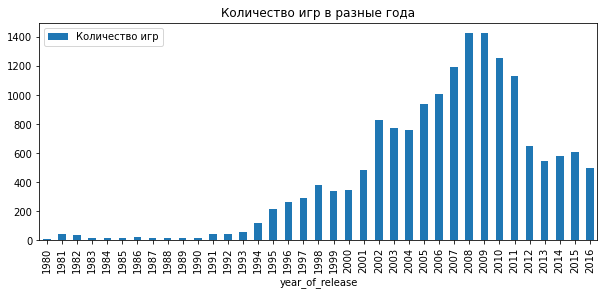

In [32]:
df.pivot_table(index='year_of_release', values='platform', aggfunc=['count']).plot(figsize=(10,4), kind='bar')
plt.title('Количество игр в разные года')
plt.legend(['Количество игр'])
plt.show()

**Статистика продаж игр начинается с 1980 года Atari 2600, появилась к Рождеству 1977 года и стала доминирующей игровой приставкой конца 1970-х — начала 1980-х. В течение 10 лет выпуск новых игр не большой 20-30 в год. Пик приходится на 1981 год.  В 90-х годах появляется Game Boy — 8-битная портативная игровая система, разработанная и произведённая компанией Nintendo. Super Nintendo Entertainment System — 16-разрядная игровая приставка, выпущенная компанией Nintendo в США, Бразилии, Европе и Австралии. PlayStation — игровая приставка пятого поколения, разработанная компанией Sony Computer Entertainment и до 2002 года. Выпуск новых игр растет за период с 1990-2000года в среднем выпускается 170 игр в год. Пик приходится на 1998 год. С 2000-2010 год выпускается самое большое количество новых игр. С 2008-2009 выпускается по 1400 новых игр в год. В 2012 году производство игр резко сократилось. И к 2016 откатилось до 500 игр в год.** 

*Посмотрим, как менялись продажи по платформам. Найдем платформы с наибольшими суммарными продажами и построим распределение по годам.*

In [33]:
df.groupby(['platform','name'])['year_of_release'].count().sort_values(ascending=False)

platform  name                                     
X360      Need for Speed: Most Wanted                  2
PS3       Madden NFL 13                                2
PC        Need for Speed: Most Wanted                  2
PSP       Field Commander                              1
          Final Fantasy IV: The Complete Collection    1
                                                      ..
PC        The Sims                                     1
          The Sims 2                                   1
          The Sims 2: Apartment Life                   1
          The Sims 2: Bon Voyage                       1
XOne      Zumba Fitness: World Party                   1
Name: year_of_release, Length: 16441, dtype: int64

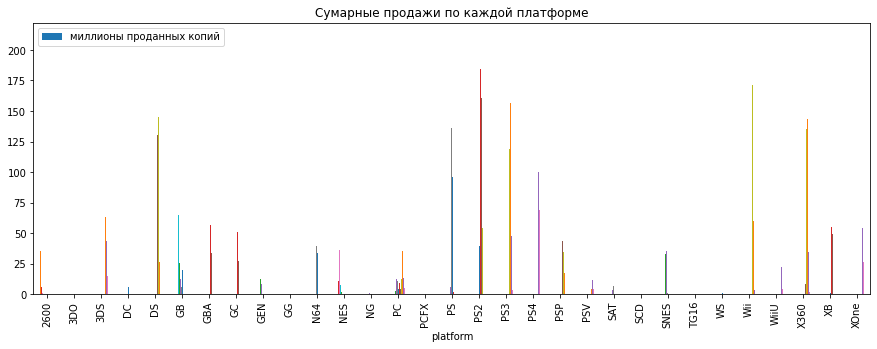

In [34]:
df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc=['sum']).plot(figsize=(15,5), kind='bar')
plt.title('Сумарные продажи по каждой платформе')
plt.legend(['миллионы проданных копий'])
plt.show()

**По продажам лидируют 6 платформ, рассмотрим их продажи по годам.**  

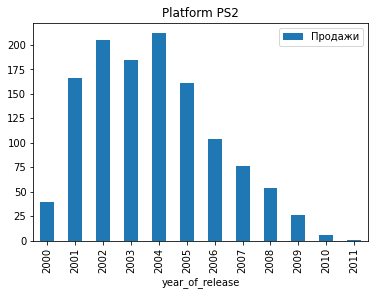

In [35]:
df[df['platform'] == 'PS2'].pivot_table(index='year_of_release', values='total_sales', aggfunc=['sum']).plot(kind='bar')
plt.title('Platform PS2')
plt.legend(['Продажи'])
plt.show()

**PlayStation 2 (PS2) - это домашняя игровая приставка, разработанная и продаваемая компанией Sony Computer Entertainment. Впервые он был выпущен в Японии 4 марта 2000 года.**
*Это самая крупная платформа по продажам игр. С 2000 года начались первые продажи и за 2-3 года, достигло топоых значений, за которыми последовал плавный спад, через 10 лет своего существования платформа исчезла.*

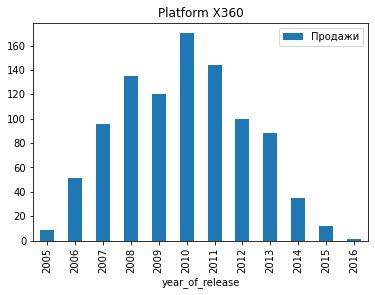

In [36]:
df[df['platform'] == 'X360'].pivot_table(index='year_of_release', values='total_sales', aggfunc=['sum']).plot(kind='bar')
plt.title('Platform X360')
plt.legend(['Продажи'])
plt.show()

**Xbox 360 — вторая по счёту игровая приставка компании Microsoft, которая последовала за Xbox. Конкурентами Xbox 360 среди игровых платформ седьмого поколения. Продажи начинаются с 2005 года.**
*За 4-5 лет достигают пика продаж, за которым следует плавный спад. Так же через 10 лет платформа исчезла.* 

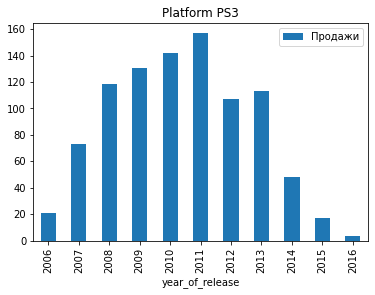

In [37]:
df[df['platform'] == 'PS3'].pivot_table(index='year_of_release', values='total_sales', aggfunc=['sum']).plot(kind='bar')
plt.title('Platform PS3')
plt.legend(['Продажи'])
plt.show()

**PlayStation 3 (PS3) - это домашняя игровая консоль, разработанная компанией Sony Computer Entertainment. Он является преемником PlayStation 2и является частью бренда консолей PlayStation. Впервые он был выпущен 11 ноября 2006 года в Японии,17 ноября 2006 года в Северной Америке и 23 марта 2007 года в Европе и Австралии. PlayStation 3 конкурировала в основном с Microsoft Xbox 360 и Nintendo Wii в рамках седьмого поколения игровых консолей.**
*За 4-5 лет достигают пика продаж, за которым следует плавный спад. Так же через 10 лет платформа исчезла.* 

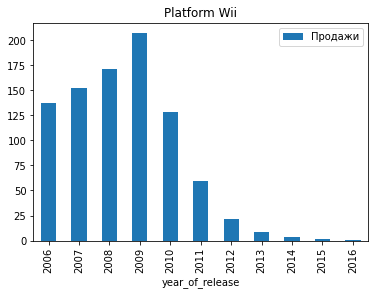

In [38]:
df[df['platform'] == 'Wii'].pivot_table(index='year_of_release', values='total_sales', aggfunc=['sum']).plot(kind='bar')
plt.title('Platform Wii')
plt.legend(['Продажи'])
plt.show()

**Wii (/wiː/ WEE) - это домашняя игровая консоль, разработанная и продаваемая Nintendo. Впервые он был выпущен 19 ноября 2006 года в Северной Америке и в декабре 2006 года для большинства других регионов.**
*За 4-5 лет достигают пика продаж, за которым следует плавный спад. Так же через 10 лет платформа исчезла.*

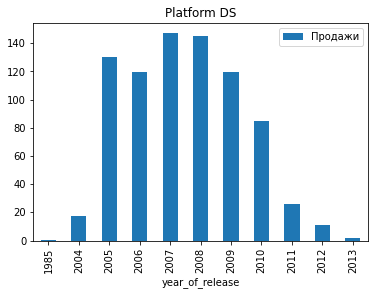

In [39]:
df[df['platform'] == 'DS'].pivot_table(index='year_of_release', values='total_sales', aggfunc=['sum']).plot(kind='bar')
plt.title('Platform DS')
plt.legend(['Продажи'])
plt.show()

**Nintendo DS — следующее поколение карманных игровых консолей компании Nintendo после Game Boy Advance SP. Консоль была выпущена в 2004 году в Канаде, США и Японии.**
*За 4-5 лет достигают пика продаж, за которым следует плавный спад. Так же через 10 лет платформа исчезла.*

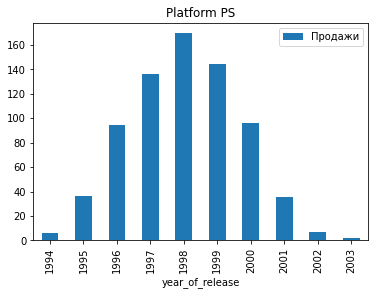

In [40]:
df[df['platform'] == 'PS'].pivot_table(index='year_of_release', values='total_sales', aggfunc=['sum']).plot(kind='bar')
plt.title('Platform PS')
plt.legend(['Продажи'])
plt.show()

**PlayStation — игровая приставка пятого поколения, разработанная компанией Sony Computer Entertainment под руководством Кэна Кутараги.** 
*За 3-4 лет достигают пика продаж, за которым следует плавный спад. Так же через 10 лет платформа*

# Вывод: 

**Новые платформы появляются с периодичностью раз в год иногда два. За 3-4 года платформа достигает роста продаж, за которым следует спад. Через 10 лет платформы исчезают.** 

**Для построения прогноза на 2017 лучше взять актуальный период 3 года. С 2014 по 2016  года. Так как данные за 2016 год не полные, а прежние года уже не актуальны, учитывая как быстро платформы достигают своего пика продаж.
Посмотрим, какие платформы лидируют по продажам, что бы выбрать несколько потенциально прибыльных платформ для анализа.**


In [41]:
actual_per = df.query('year_of_release >= 2014')

In [42]:
actual_per.groupby(['platform'])['total_sales'].sum()\
.sort_values(ascending=False)


platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

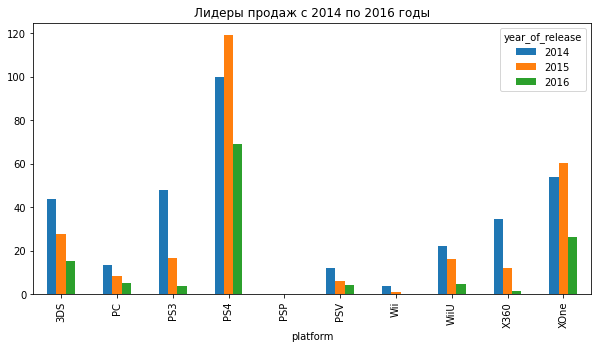

In [43]:
actual_per.pivot_table(index='platform', columns='year_of_release',\
values='total_sales', aggfunc=['sum']).reset_index(level='platform').plot(x='platform', y='sum',\
kind='bar', figsize=(10,5))
plt.title('Лидеры продаж с 2014 по 2016 годы')
plt.show()

**По продажам за актуальный период лидирует PS4 с падающим ростом продаж. На втором месте XOne. Видно что на всех платвормах продажи падают.**

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

In [44]:
actual_per.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


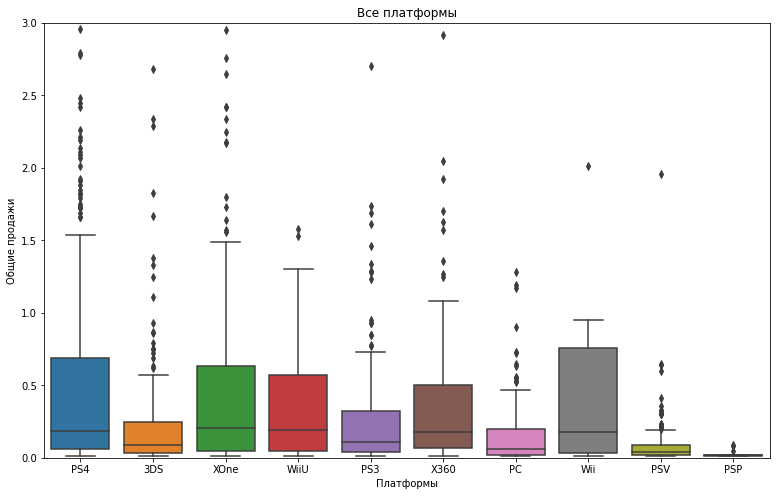

In [45]:
plt.figure(figsize=(13, 8))
sns.boxplot(x='platform', y='total_sales', data=actual_per)\
.set(title = 'Все платформы', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3))
plt.show()

**Видно, что распределение на всех рассматриваемых  платформах неравномерное идет перекос в сторону больших значений, у всех есть выбросы.**

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

In [46]:
ps_4 = actual_per.query('platform == "PS4"')
ps_4[['user_score','critic_score','total_sales']].corr()['total_sales']

user_score     -0.040132
critic_score    0.402661
total_sales     1.000000
Name: total_sales, dtype: float64

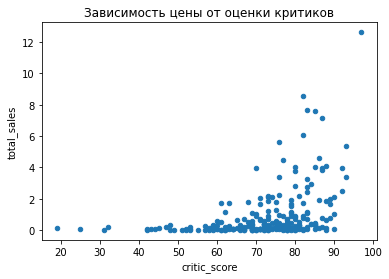

In [47]:
ps_4.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Зависимость цены от оценки критиков')
plt.show()

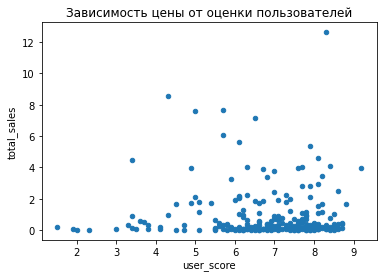

In [48]:
ps_4.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Зависимость цены от оценки пользователей')
plt.show()

**Оценки игр критиков и пользователей в основном располагаются на позициях выше среднего. При этом из диаграммы видна отрицательная корреляция, по отзывам покупателей и слабоположительная корреляция, по отзывам критиков** 

*Соотнесем выводы с продажами игр на других платформах.*

In [49]:
X360 = actual_per.query('platform == "X360"')
X360[['user_score','critic_score','total_sales']].corr()['total_sales']

user_score     -0.138445
critic_score    0.525723
total_sales     1.000000
Name: total_sales, dtype: float64

In [50]:
XOne = actual_per.query('platform == "XOne"')
XOne[['user_score','critic_score','total_sales']].corr()['total_sales']

user_score     -0.070384
critic_score    0.428677
total_sales     1.000000
Name: total_sales, dtype: float64

In [51]:
DS3 = actual_per.query('platform == "3DS"')
DS3[['user_score','critic_score','total_sales']].corr()['total_sales']

user_score      0.215193
critic_score    0.314117
total_sales     1.000000
Name: total_sales, dtype: float64

In [52]:
WiiU = actual_per.query('platform == "WiiU"')
WiiU[['user_score','critic_score','total_sales']].corr()['total_sales']

user_score      0.407926
critic_score    0.370201
total_sales     1.000000
Name: total_sales, dtype: float64

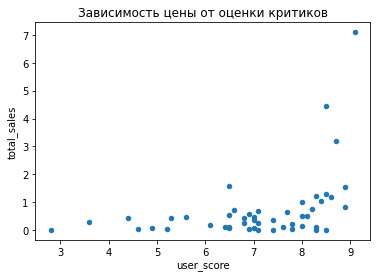

In [53]:
WiiU.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Зависимость цены от оценки критиков')
plt.show()

In [54]:
Wii = actual_per.query('platform == "Wii"')
Wii[['user_score','critic_score','total_sales']].corr()['total_sales']

user_score      1.0
critic_score    NaN
total_sales     1.0
Name: total_sales, dtype: float64

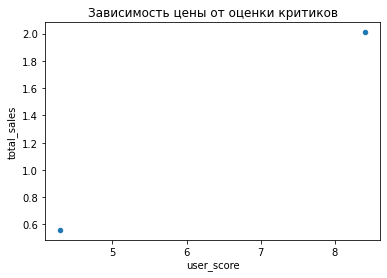

In [55]:
Wii.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Зависимость цены от оценки критиков')
plt.show()

**На всех платформах нет явной зависимости продаж от оценки критиков и пользователей.**


Можно сказать, что оценка критиков имеет слабое влияние на продажи, оценка пользователей на продажи не влияет. 


*Посмотрим на общее распределение игр по жанрам.* 

In [56]:
actual_per.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Puzzle,14.0,0.157857,0.320629,0.01,0.0200,0.045,0.1000,1.19
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63


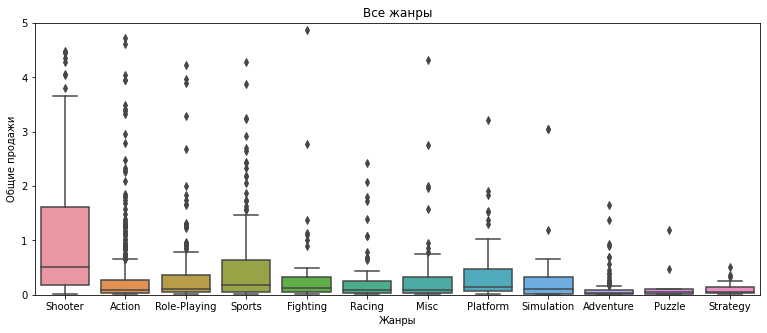

In [57]:
plt.figure(figsize=(13, 5))
sns.boxplot(x='genre', y='total_sales', data=actual_per).set(title = 'Все жанры', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 5))
plt.show()

**В распределении продаж по жанрам видим очень существенные выбросы. Вероятнее всего на распределение влияют какие то конкретные игры а не сам жанр. посмотрим на медианное значение.**

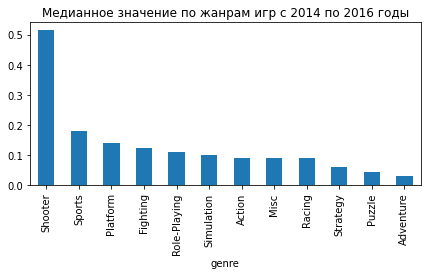

In [58]:
actual_per.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(x='genre', y='median',\
kind='bar', figsize=(7,3))
plt.title('Медианное значение по жанрам игр с 2014 по 2016 годы')
plt.show()

**Самый продаваемый жанр Shooter за ним идет Sports. А самые низкие продажи у жанров Puzzle и Adventure**

<h2>Шаг. Составление портрета пользователя каждого региона

Определим для пользователя каждого региона:

* самые популярные платформы (топ-5)

* самые популярные жанры (топ-5)

* Влияет ли рейтинг ESRB на продажи в отдельном регионе

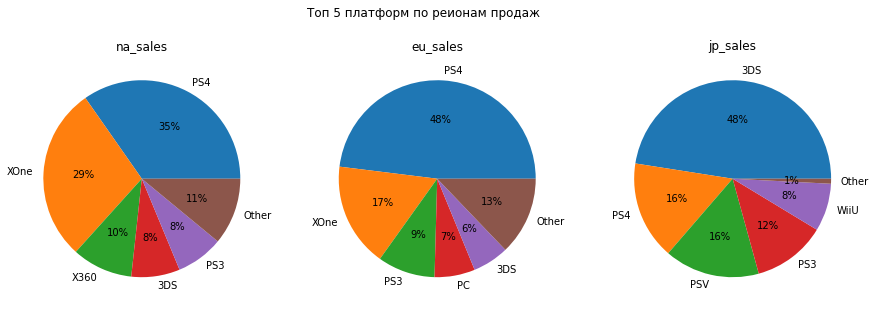

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.ravel()
fig.suptitle('Топ 5 платформ по реионам продаж')
i=0
 
for i, reg in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    all_platforms = actual_per.groupby('platform').agg({reg: 'sum'}).sort_values(by=reg, ascending=False)
    top_5_platform = all_platforms.head(5)
    other = pd.DataFrame(
        all_platforms.reset_index()[all_platforms.reset_index().index > 4][reg].sum(), index=['Other'], columns=[reg])
    top_6_platform = pd.concat([top_5_platform, other])
    axes[i].pie(top_6_platform[reg], labels=top_6_platform.index, autopct='%.0f%%')
    axes[i].set_title(reg)
plt.show()

**В Северной Америке и Европе лидируют  PS4,Xbox One,за ними идут PS3, Xbox 360, Nintendo 3DS. В Европе так же популярна  платформа РС. Другие платформы занимают в этих регионах 10-13% рынка. 
В Японии другие предпочтения, лидер Nintendo 3DS дальше  идут PS4, PS3, PS Vita，Nintendo WiiU, другие платформы занимают лишь 1%.**


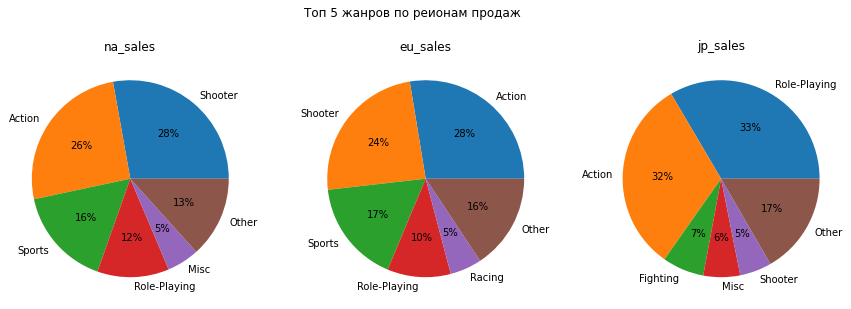

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.ravel()
fig.suptitle('Топ 5 жанров по реионам продаж')
i=0
 
for i, reg in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    all_genre = actual_per.groupby('genre').agg({reg: 'sum'}).sort_values(by=reg, ascending=False)
    top_5_genre = all_genre.head(5)
    other_ganre = pd.DataFrame(
        all_genre.reset_index()[all_genre.reset_index().index > 4][reg].sum(), index=['Other'], columns=[reg])
    top_6_ganre = pd.concat([ top_5_genre, other_ganre])
    axes[i].pie(top_6_ganre[reg], labels=top_6_ganre.index, normalize=True, autopct='%.0f%%')
    axes[i].set_title(reg)
plt.axis() 
plt.show()

**В Северной Америке и Европе популярный жанр игр Shooter, потом Sports и Platform. Racing популярнее в Европе, чем в Северной Америке. Fighting в Америке, а в Европе Simulation. Доля других жанров не долее 2%.
В Японии лидирует жанр Role-Playing затем  Fighting , Puzzle, Adventure и Action.**


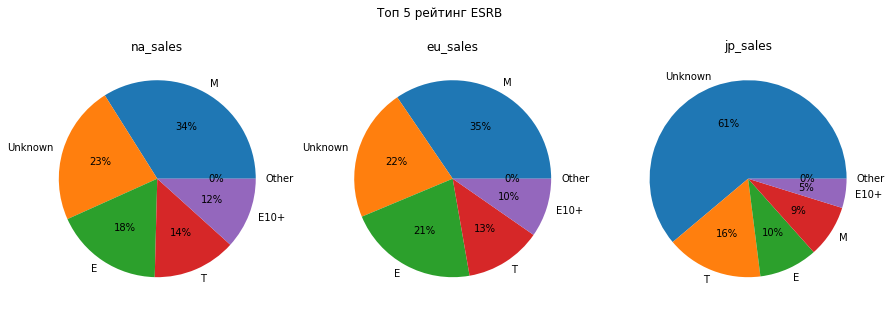

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.ravel()
fig.suptitle('Топ 5 рейтинг ESRB')
i=0
 
for i, reg in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    all_rating = actual_per.groupby('rating').agg({reg: 'sum'}).sort_values(by=reg, ascending=False)
    top_5_rating = all_rating.head(5)
    other_rating = pd.DataFrame(
        all_rating.reset_index()[all_rating.reset_index().index > 4][reg].sum(), index=['Other'], columns=[reg])
    top_6_rating = pd.concat([ top_5_rating, other_rating])
    axes[i].pie(top_6_rating[reg], labels=top_6_rating.index, normalize=True, autopct='%.0f%%')
    axes[i].set_title(reg)
plt.axis() 
plt.show()

# Вывод #  
**Пользователи  Северной Америки и Европы очень схожи, так, к примеру, преимуществом в этих регионах пользуются платформы PS4 и XOne, жанр Shooter, с рейтингом ESRB М – от 17+ так же есть игры, у которых рейтинг по ESRB не определён. 
Японские пользователи имеют другие предпочтения, здесь половину рынка занимает платформа 3DS  и PS4 тоже продается, но на нее приходится всего 15%. Популярны жанры Role-Playing, Fighting, Puzzle занимает 23% рынка. По рейтингу ESRB больше половины отсутствуют, видимо по тому, что японская система рейтинга  CERO имеет другие возрастные критерии.** 


# 5. Проверка гипотез #

* cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
* cредние пользовательские рейтинги жанров Action и Sports разные

**Проверим гипотезы:**
* H0: средние рейтинги по платформам одинаковые Xbox One и PC одинаковые
* H1: средние рейтинги по платформам Xbox One и PC разные


In [62]:
actual_per = actual_per.dropna(subset=['user_score'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [64]:
x_one = actual_per[actual_per['platform'] == 'XOne']['user_score']
pc = actual_per[actual_per['platform'] == 'PC']['user_score']

In [65]:
actual_per.isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       184
user_score           0
rating               0
total_sales          0
dtype: int64

In [66]:
alpha = .05
results = st.ttest_ind(x_one,pc, equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


* H0: средние рейтинги по жанрам Action и Sports одинаковые
* H1: средние рейтинги по жанрам Action и Sports разные

In [67]:
action = actual_per[actual_per['genre'] == 'Action'] ['user_score']
sports =  actual_per[actual_per['genre'] ==  'Sports']['user_score']

In [68]:

alpha = .05

results = st.ttest_ind(action,sports, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


<h1> Общий вывод

**Было проведено исследование всемирного рынка компьютерных игр, с целью выявить закономерности определяющие успешность игры и выбрать потенциально популярный продукт, что бы спланировать рекламную компанию на 2017 год для Интернет – магазина «Стримчик» который продает по всему миру компьютерные игры. Данные взяты из открытых источников с 1980 по 2016 года. Перед проведением исследования были поставлены несколько гипотез.**
 * Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Гипотеза не подтвердилась. Средние пользовательские рейтинги платформ Xbox One и PC разные. 
 * Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные
Гипотеза подтвердилась. Средние пользовательские рейтинги жанров Action и Sports разные

*В результате исследования удалось выяснить*
**Актуальный период для построения прогноза на 2017 год.**
Проанализировав продажи за все время выяснилось, что в среднем платформы достигают своего пика за 3-5 лет с момента появления на рынке. Срок жизни платформы 10 лет. Поэтому актуальный период для анализа 2014-2016 год.
В данном периоде только 10 платформ имели продажи. Лидер продаж платформа **PlayStation  PS4** 
- Европа 48% рынка
- Северная Америка 35%  рынка
- Япония 16% Рынка

 **Xbox One** 
 
- Северная Америка 29%  рынка
- Европа 17% рынка

**Если рассматривать Японию как отдельный сегмент, нужно обратить внимание на 
Nintendo 3DS**

- Япония 48% Рынка
Но не нужно забывать, что пика продаж платформа достигла в 2016 году, и в  2017 году, возможно,  будет терять позиции. 

**Среди игровых жанров явный лидер Шу́тер (Стрелялка, англ. shooter — «стрелок»)**

- Европа 53% рынка
- Северная Америка 51%  рынка
- Япония не популярен

**Sports (Спортивный симулятор — это видеоигра, которая имитирует занятия спортом.)**

- Европа 12% рынка
- Северная Америка 16%  рынка
- Япония не популярен

Если рассматривать Японию как отдельный сегмент, нужно обратить внимание на жанр
Ролевая игра представляет собой моделирование событий, происходящих в определённом мире в определённое время

- Япония 38% Рынка

Возрастной рейтинг от организации ESRB можно твердо считать категорию M «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.

# Общие рекомендации #
    

В 2017 году можно сделать ставку на платформу сделать ставку **PlayStation 4** — игровая приставка восьмого поколения, выпускаемая японской компанией Sony. PlayStation 4 входит в семейство игровых приставок PlayStation и была выпущена на смену PlayStation 3 — предыдущей домашней игровой консоли той же компании. Официальный анонс PlayStation 4 состоялся на конференции PlayStation Meeting 2013 в феврале 2013 года, продажи начались в ноябре 2013 года в США, Европе, Южной Америке, России и Австралии и в феврале 2014 года в Японии[7]. Осенью 2016 года Sony выпустила две новые аппаратные версии приставки: PlayStation 4 Slim, обладающую уменьшенными габаритами, и PlayStation 4 Pro, оснащённую более мощными основным и графическим процессором с расчётом на возможность вывода изображения и потокового видео в разрешении 4K. 
**Жанры**
:
*Шу́тер (Стрелялка, англ. shooter — «стрелок»)* 
*Sports (Спортивный симулятор — это видеоигра, которая имитирует занятия спортом.)* 

**Возрастной рейтинг от организации ESRB M** 

**Рынок Японии нужно рассматривать как отдельный сегмент**
